# Milestone 3 - Understanding Transfer Learning

__Objective__: Use Transfer Learning to improve accuracy on the `CIFAR10` dataset. The purpose is to get experience using pre-trained models. 

__Workflow__:
1.  Load the `CIFAR10` dataset (contained in Keras's datasets) and train a Deeper CNN with the following configuration:
![CNN](https://github.com/rajeevratan84/Manning/blob/master/CNN_2.png?raw=true)
2.  Train this CNN for 10 Epochs or more using a Batch Size of 32 (the batch size doesn’t matter significantly, as it’s depends on your RAM size)
    - Closely examine the performance metrics of your trained CNN. The accuracy after 10 EPOCHS should be between 60 and 65% on the test data set. This isn’t great, but how can we do better?
3.  Let’s see what our CNN is capable of by testing your model on some of the Test images as you did in Milestone 1. How would you compare its classification performance to yourself, a human (I assume)?
4.  You might be disappointed with its performance, now let’s use Transfer Learning to significantly improve this! 
    - Load the weights of a pre-trained CNN such as `VGG16`.
    - You'll need to import it using `from tensorflow.keras.applications import vgg16 as vgg.
5. Do not include the top layer when loading, we'll be using this model to apply the concept of Transfer Learning.
  - You’ll need to use the function `vgg.VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))` to do so
6.  Extract the last layer from the third block of the `VGG16` model. We’ll be re-using the VGG model up to `block3_pool`.
7. Add classification layers for the `CIFAR10` classes on top of it. Using:
![Add CNN](https://i.imgur.com/FAKsn4z.jpg)
8. Freeze all layers in the pretrained VGG16 model as we'll be reusing them and them compile our merged model.
    - Iterate through our` base_model.layers` and set the trainable parameter to be false by using `layer.trainable = False`
9. Use the Keras Data Generator function to load in our image data (not required but it's good to get some familiarity with it)
10. Train this model for at least 5 (10 preferably) Epochs and note the improved accuracy compared to the previous model.
11. Visualize the filters of the pre-trained VGG16 model
    - Reload our VGG16 model
    - Extract the conv layers only as we all want the filters and biases values of these
    - Inspect the bias and weights using from the third Conv layer using `get_weights()`. This gives you a better idea of what filters and biases actually are.
12. Now plot the first 6 conv filters:
    - Firstly normalize the filter values between 0 and 1 so that we can visualize them
    - Get the value by using `f = filters[:, :, :, i]`
    - Plot or Visualize it by using `plt.imshow(f[:, :, j], cmap='gray')`
13. Visualize the Feature Maps of VGG16 by running an input image (of your choice) through the model
    - Redefine the model to output right after the first hidden layer using ` model = Model(inputs=model.input, outputs=model.layers[1].output`
    - Use the inbuilt Keras preprocessing functions `load_img` and `img_to_array` along with numpy’s `expand_dims` and keras’s VGG16 preprocessing function `from tensorflow.keras.applications.vgg16 import preprocess_input` to create the feature map activations
14. Plot these feature maps for the outputs of the 5 Convolution Blocks, indexed by [2, 5, 9, 13, 17]


The purpose of this lesson was to get some familiarity with Transfer Learning and consequently the usefulness of pre-trained models. 


__Deliverable__:

The deliverable is a Jupyter Notebook documenting your workflow as you take your first train your `CIFAR10` model from scratch. Next, you are to load a pre-trained VGG16 model, without the top layer, freezing the weights of this model and then combining it with the new top layer that is appropriate for `CIFAR10`. You should note the improvement in model accuracy.

### Let's Begin training out model for CIFAR-10 using a deeper CNN.

The 10 classess in the CIFAR-10 dataset:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

In [0]:
from __future__ import print_function
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
import os

batch_size = 32
num_classes = 10
epochs = 10

# Loads the CIFAR dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Display our data shape/dimensions
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Format our training data by Normalizing and changing data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Now we one hot encode outputs
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
# Padding = 'same'  results in padding the input such that
# the output has the same length as the original input
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's create our model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.01),
              metrics = ['accuracy'])

print(model.summary())

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_______________________________________________

### Training our model

In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
          verbose=1)

model.save("cifar_simple_cnn_2.h5")

# Evaluate the performance of our trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1201 - accuracy: 0.2122 - val_loss: 1.8985 - val_accuracy: 0.3230
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8112 - accuracy: 0.3435 - val_loss: 1.6228 - val_accuracy: 0.4205
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6404 - accuracy: 0.4013 - val_loss: 1.5687 - val_accuracy: 0.4251
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5247 - accuracy: 0.4450 - val_loss: 1.3873 - val_accuracy: 0.4862
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4322 - accuracy: 0.4774 - val_loss: 1.3171 - val_accuracy: 0.5223
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3608 - accuracy: 0.5075 - val_loss: 1.2349 - val_accuracy: 0.5574
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3004 - accuracy: 0.5334 - val_loss: 1.2198 - val_accu

## Testing on some of the Test images

### Create a function to get class labels

In [0]:
def getName(label, class_labels):
  return class_labels.get(int(label))

truck	cat	frog	automobile	automobile	

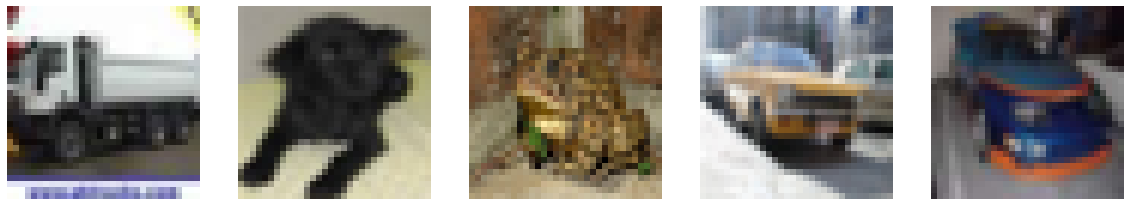

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

class_labels = {0: 'airplane',
  1: 'automobile',
  2: 'bird',
  3: 'cat',
  4: 'deer',
  5: 'dog',
  6: 'frog',
  7: 'horse',
  8: 'ship',
  9: 'truck'}


figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    random_idx = np.random.randint(0,len(x_test))
    plt.imshow(x_test[random_idx])
    plt.axis("off")
    label = np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,32,32,3)),axis=1),axis=0)
    print(getName(label, class_labels), end="\t")

# Now let's use Transfer Learning to Get Better Accuracy

In [0]:
# Perform our imports 
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model
from tensorflow.keras.applications import vgg16 as vgg
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Define some parameters

In [0]:
BATCH_SIZE = 32
EPOCHS = 5
NUM_CLASSES = 10
LEARNING_RATE = 1e-4
MOMENTUM = 0.9

In [0]:
#We import scipy to resize our images quickly
import scipy.misc 

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

X_train = np.array([cv2.resize(x, (48, 48), interpolation = cv2.INTER_AREA) for x in x_train])
X_test = np.array([cv2.resize(x, (48, 48), interpolation = cv2.INTER_AREA) for x in x_test])


In [0]:
# Perform our hot one encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Import our pre-trained model VGG16, but without the 'head' layer

In [0]:
from tensorflow.keras.applications import vgg16 as vgg

base_model = vgg.VGG16(weights='imagenet', 
                       include_top=False, 
                       input_shape=(48, 48, 3))

58892288/58889256 [==============================] - 1s 0us/step


## Extract the last layer from third block of vgg16 model

In [0]:
last = base_model.get_layer('block3_pool').output

## Add classification layers on top of it

In [0]:
# Add classification layers on top of it
# x is our 'model' that we're putting ontop part of our pre-trained model (above)
x = GlobalAveragePooling2D()(last)
x= BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# We make our top model
number_of_classes = 10
top = Dense(number_of_classes, activation='softmax')(x)

# Construct our ful model now
model = Model(base_model.input, top)

## Freeze all layers in the model as we'll be reusing them

In [0]:
# We now just iterate through our base model to 'Freeze' the layers so that we don't train them
for layer in base_model.layers:
     layer.trainable = False

## Compile our Merged Model 

In [0]:
# Now lets compile our merged model        
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

## Show our model summary

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

## Setup to use the Data Generator function

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=False)

In [0]:
# Use our Data Generator to get our data
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train,
                                     y_train, 
                                     batch_size=BATCH_SIZE)

val_datagen = ImageDataGenerator(rescale=1. / 255, horizontal_flip=False)

val_datagen.fit(X_test)
val_generator = val_datagen.flow(X_test,
                                 y_test,
                                 batch_size=BATCH_SIZE)

# Training your model

In [0]:
# We're ready to start training now

train_steps_per_epoch = X_train.shape[0] // BATCH_SIZE
val_steps_per_epoch = X_test.shape[0] // BATCH_SIZE

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=EPOCHS,
                              verbose=1)

Epoch 1/5
1562/1562 [==============================] - 19s 12ms/step - loss: 0.1806 - accuracy: 0.6061 - val_loss: 0.1534 - val_accuracy: 0.6672
Epoch 2/5
1562/1562 [==============================] - 19s 12ms/step - loss: 0.1629 - accuracy: 0.6486 - val_loss: 0.1440 - val_accuracy: 0.6864
Epoch 3/5
1562/1562 [==============================] - 19s 12ms/step - loss: 0.1538 - accuracy: 0.6696 - val_loss: 0.1371 - val_accuracy: 0.7061
Epoch 4/5
1562/1562 [==============================] - 19s 12ms/step - loss: 0.1465 - accuracy: 0.6877 - val_loss: 0.1317 - val_accuracy: 0.7199
Epoch 5/5
1562/1562 [==============================] - 19s 12ms/step - loss: 0.1422 - accuracy: 0.6966 - val_loss: 0.1292 - val_accuracy: 0.7234


#### In just 5 EPOCHs we've attained much higher accuracy using Transfer Learning (~72% in 5 Epochs vs 64% with 10 Epochs with our previous model, using roughly the same training time). Furthermore, using Transfer Learning for more Epochs allows us to attain even better accuracy than was possible with our previous model). Taking advantage of pre-trained models and training only the top layers allows us to use take advantaged of the pre-trained weights. But what exactly do these 'leanred' weights know?

## Now let's visualize the filters of the pretrained VGG16 model

In [0]:
from tensorflow.keras.applications import vgg16 as vgg

model = vgg.VGG16(weights='imagenet', 
                       include_top=False)

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
layer_dict

{'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f1384039320>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f13e3589470>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f13d0043fd0>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f1376687898>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f1358747630>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f1376083b70>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f1376083748>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f13569275f8>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f1376ec8940>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f1376eed710>,
 'block4_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f1376ec8e10>,
 'block4_conv

In [0]:
# summarize filter shapes
for layer in model.layers:
  # check for convolutional layer
  
  if 'conv' not in layer.name:
    continue

  # get filter weights
  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


In [0]:
# retrieve weights from the third hidden layer
filters, biases = model.layers[2].get_weights()

In [0]:
# Let's take a look at our filters
filters

array([[[[ 1.66219279e-01,  1.42701820e-01, -4.02113283e-03, ...,
           6.18828237e-02, -1.74057148e-02, -3.00644431e-02],
         [ 9.46945231e-03,  3.87477316e-03,  5.08365929e-02, ...,
          -2.77981739e-02,  1.71373668e-03,  6.82722731e-03],
         [ 6.32681847e-02,  2.12877709e-02, -1.63465310e-02, ...,
           8.80054955e-04,  6.68104272e-03, -1.41139806e-03],
         ...,
         [ 3.47490981e-03,  8.47019628e-02, -4.07223180e-02, ...,
          -1.13523193e-02, -7.48998486e-03,  3.19077494e-03],
         [ 5.97234145e-02,  4.97663505e-02, -3.23118735e-03, ...,
           1.43114366e-02,  3.03175431e-02, -4.23925705e-02],
         [ 1.33459672e-01,  4.95484173e-02, -1.78808011e-02, ...,
           2.25385167e-02,  3.02020740e-02, -2.17075031e-02]],

        [[ 2.12007999e-01,  2.10127644e-02, -1.47626130e-02, ...,
           2.29580477e-02,  1.23102348e-02, -3.08422819e-02],
         [-2.62175221e-03,  7.42094172e-03,  6.74030930e-02, ...,
          -3.06594316e

In [0]:
# And now let's look at our biases
biases

array([-0.30912212,  0.36397225,  0.13737613,  0.07717966,  0.9052184 ,
        0.08885256,  0.10789118, -0.23106739, -0.6318097 ,  0.18161367,
       -0.33391494,  0.1961724 ,  0.43838617,  0.1938708 ,  0.10894354,
        0.10315038, -1.0271513 ,  0.05252688,  0.13118458,  0.22851577,
       -0.71377224,  0.2154155 , -0.6981962 ,  0.04061132,  0.13955347,
        0.28767544,  0.35358745,  0.3937295 ,  0.43452853, -0.48259264,
        0.02631121,  0.09220165,  0.05196398,  0.550705  ,  0.32368094,
        0.07263482, -0.17745508,  0.3761972 ,  0.39344102,  0.17673127,
       -0.15784228,  0.26051855,  0.08342359,  0.08603705, -0.09131282,
        0.22932515,  0.2998315 ,  0.13511261, -0.3835829 ,  0.10912544,
       -0.53432876,  0.4741787 , -0.0740848 ,  0.30046257,  0.12590808,
        0.16480374,  0.2403943 ,  0.23401979, -0.19334187,  0.01663565,
        0.27144948,  0.03385786,  0.06076292, -0.5825159 ], dtype=float32)

In [0]:
# Let's explore the shape of our Conv filter
filters.shape

(3, 3, 64, 64)

In [0]:
# Let's explore the shape of our biases
biases.shape

(64,)

In [0]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

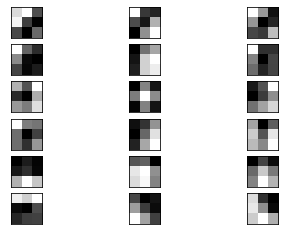

In [0]:
import matplotlib.pyplot as plt

# plot first few filters
n_filters, ix = 6, 1

for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]

	# plot each channel separately
	for j in range(3):
   
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
  
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
    
# show the figure
plt.show()

# Now let's visualize the Activation Feature Maps of VGG16 by running an input image

In [0]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from numpy import expand_dims

# load the model
model = VGG16()

553467904/553467096 [==============================] - 11s 0us/step


In [0]:
# Creates a model that will return these outputs, given the model input
# We redefine model to output right after the first hidden layer
model = Model(inputs=model.input, outputs=model.layers[1].output)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


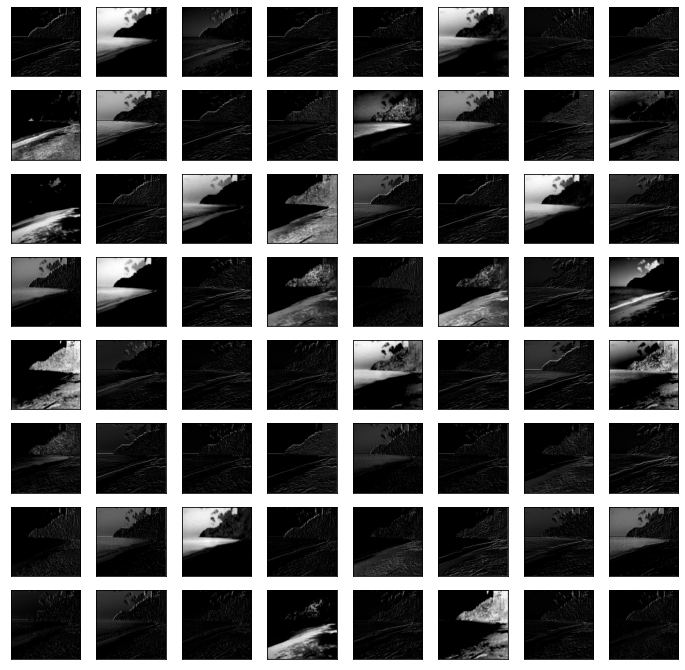

In [0]:
# display our model summary
model.summary()

# load the image with the required shape
img = load_img('sample_1.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(12,12))

for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
  
		# plot filter channel in grayscale
		plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1

# show the figure
plt.show()

After applying the filters in the first convolutional layer we can see there are 64 versions of the image with different features highlighted. Some highlight lines, other focus on the background or the foreground, some even seem to focus on different elements in our foreground.

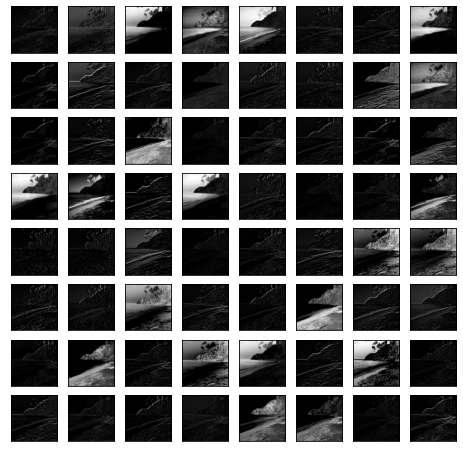

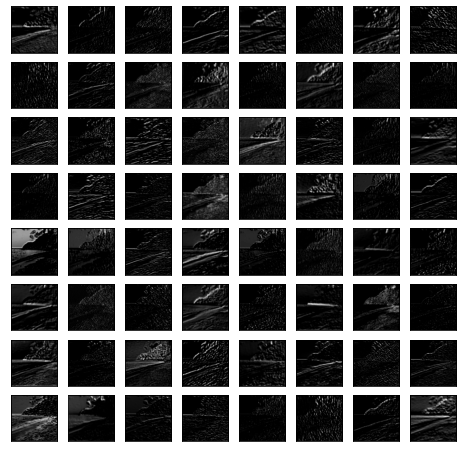

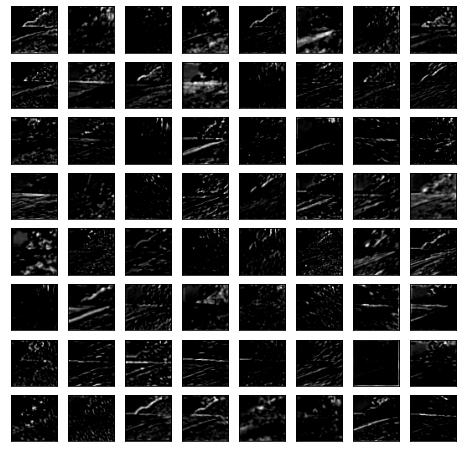

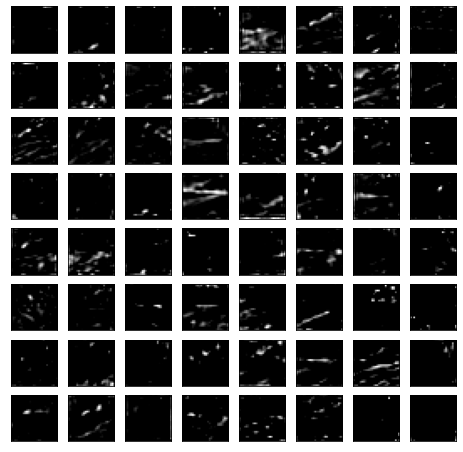

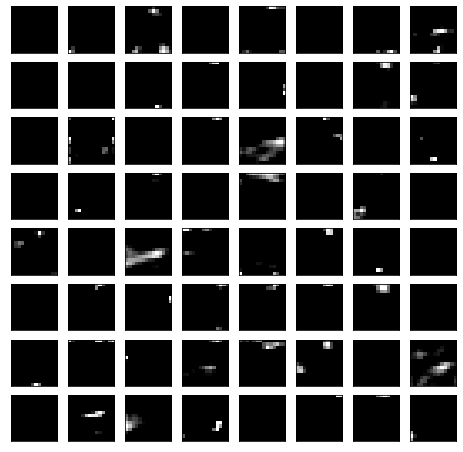

In [0]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

model = VGG16()

# Our CONV layers we wish to visualize
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

img = load_img('sample_1.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	plt.show()

This gives us five plots showing the feature maps from the five main blocks of the VGG16 model.

We can see that the feature maps closer to the input of the model capture a lot of fine detail in the image and that as we progress deeper into the model, the feature maps show less and less detail. 

This doesn't mean the higher layers are learnin simpler patterns. It means that the small sized upper Conv filters are activated by a combination of different lower layer filters, hence this is how they learn more complex patterns.

In the next milestone we'll learn how to visualize inputs to maximize these filters. 

# Summary

In this notebook we:
* Loaded the `CIFAR10` dataset and trained a CNN when given specifications 
* We loaded a pre-trained `VGG16` model and applied the concept of Transfer Learning to improve performance on our `CIFAR10` dataset. 
* We then visualized some of the filters of a pretrained `VGG16` model
* Finally we visualized the Feature Maps or activation maps for input image for the VGG16 model

The end deliverable from this section is an ipython notebook that contains the described CNN trained on `CIFAR10` followed by the use of transfer learning where you would have used the pretrained (on imagenet) `VGG16` model. After which, you would have visualized some of the CONV filters of VGG16 and then run an input image through this model to visualize the Feature Maps.